### Data exploratory analysys 

Importing the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
inx_data = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
inx_data.head(2)

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
0  E1001000   32   Male           Marketing        Single         Sales   
1  E1001006   47   Male           Marketing        Single         Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  

[2 rows x 28 columns]

### Finding duplicates

In [79]:
duplicate = inx_data.duplicated()
print('Totoal duplicates: ',duplicate.sum())

Totoal duplicates:  0


### Department wise  analysis 

In [7]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
deptarments = inx_data.iloc[:,[5,27]].copy()
dept_performance = deptarments.copy()

In [9]:
dept_performance.mean()

PerformanceRating    2.948333
dtype: float64

In [10]:
dept_performance

EmpDepartment  PerformanceRating
0               Sales                  3
1               Sales                  3
2               Sales                  4
3     Human Resources                  3
4               Sales                  3
...               ...                ...
1195            Sales                  4
1196      Development                  3
1197      Development                  3
1198     Data Science                  3
1199            Sales                  2

[1200 rows x 2 columns]

In [18]:
dept_performance.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

-- The performnce of Data Science deportment is higher than others, where the least performance is observed with the department 
Sales


Text(0.5, 1.0, 'Department wise performance')

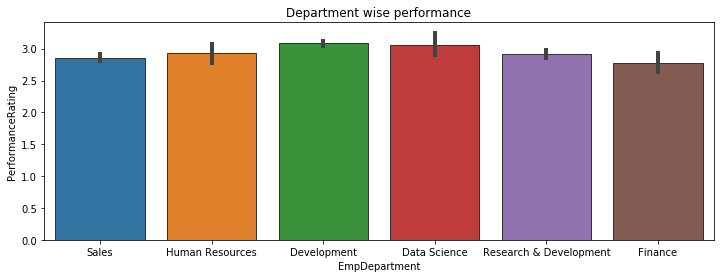

In [97]:
plt.figure(figsize=(12,4))
sns.barplot(dept_performance['EmpDepartment'],dept_performance['PerformanceRating'], errwidth=4, edgecolor=".2").set_title('Department wise performance')


### Correlation coeffienct 

We can indetify which predictors are significant

In [60]:
inx_data.corr()

Age  DistanceFromHome  EmpEducationLevel  \
Age                           1.000000          0.020937           0.207313   
DistanceFromHome              0.020937          1.000000           0.045856   
EmpEducationLevel             0.207313          0.045856           1.000000   
EmpEnvironmentSatisfaction    0.013814         -0.017719          -0.037103   
EmpHourlyRate                 0.062867          0.013730           0.014095   
EmpJobInvolvement             0.027216          0.003231           0.027544   
EmpJobLevel                   0.509139          0.017270           0.100734   
EmpJobSatisfaction           -0.002436         -0.003036           0.000357   
NumCompaniesWorked            0.284408         -0.021411           0.128674   
EmpLastSalaryHikePercent     -0.006105          0.044974           0.002358   
EmpRelationshipSatisfaction   0.049749         -0.009509          -0.016690   
TotalWorkExperienceInYears    0.680886          0.027306           0.151062   
TrainingTimesLastYear        -0.016053         -0.032082          -0.013674   
EmpWorkLifeBalance           -0.019563         -0.044788           0.010276   
ExperienceYearsAtThisCompany  0.318852          0.021908           0.076332   
ExperienceYearsInCurrentRole  0.217163          0.019898           0.066672   
YearsSinceLastPromotion       0.228199          0.013246           0.054313   
YearsWithCurrManager          0.205098          0.017860           0.088988   
PerformanceRating            -0.040164         -0.046142           0.020529   

                              EmpEnvironmentSatisfaction  EmpHourlyRate  \
Age                                             0.013814       0.062867   
DistanceFromHome                               -0.017719       0.013730   
EmpEducationLevel                              -0.037103       0.014095   
EmpEnvironmentSatisfaction                      1.000000      -0.049501   
EmpHourlyRate                                  -0.049501       1.000000   
EmpJobInvolvement                               0.004865       0.054741   
EmpJobLevel                                    -0.008272      -0.018606   
EmpJobSatisfaction                             -0.004319      -0.066417   
NumCompaniesWorked                              0.017270       0.040484   
EmpLastSalaryHikePercent                       -0.047271      -0.015934   
EmpRelationshipSatisfaction                    -0.010504       0.008783   
TotalWorkExperienceInYears                     -0.012894       0.026034   
TrainingTimesLastYear                           0.001192      -0.024160   
EmpWorkLifeBalance                             -0.000262       0.016189   
ExperienceYearsAtThisCompany                   -0.000561      -0.000399   
ExperienceYearsInCurrentRole                    0.025491      -0.011871   
YearsSinceLastPromotion                         0.010732      -0.010000   
YearsWithCurrManager                           -0.011702      -0.004576   
PerformanceRating                               0.395561      -0.043116   

                              EmpJobInvolvement  EmpJobLevel  \
Age                                    0.027216     0.509139   
DistanceFromHome                       0.003231     0.017270   
EmpEducationLevel                      0.027544     0.100734   
EmpEnvironmentSatisfaction             0.004865    -0.008272   
EmpHourlyRate                          0.054741    -0.018606   
EmpJobInvolvement                      1.000000    -0.034349   
EmpJobLevel                           -0.034349     1.000000   
EmpJobSatisfaction                    -0.005501    -0.011853   
NumCompaniesWorked                     0.018211     0.127477   
EmpLastSalaryHikePercent              -0.001742    -0.020975   
EmpRelationshipSatisfaction            0.018037     0.002992   
TotalWorkExperienceInYears            -0.028851     0.784229   
TrainingTimesLastYear                 -0.025168    -0.000389   
EmpWorkLifeBalance                    -0.014129     0.049